In [20]:
# Min-max normalization
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/jaeeponde/IML_A1/IML_A1/Regression_Task/data/training_data.csv")
df

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,3.00,3.08,2.0,4,228,1,0,0,0,1,11.2
1,4.75,4.34,4.7,8,382,1,0,0,0,1,18.8
2,4.50,4.34,4.8,8,373,1,0,0,0,1,18.9
3,4.00,4.34,4.6,8,380,1,0,1,0,0,18.5
4,4.00,4.34,4.2,6,359,1,0,1,0,0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,3.75,4.50,4.3,6,350,1,0,1,0,0,17.0
507,3.75,4.34,4.3,6,386,1,0,0,0,1,18.7
508,4.00,3.42,3.0,6,267,1,0,1,0,0,13.6
509,3.50,3.02,2.3,4,246,0,1,0,0,1,12.6


In [21]:

# Shuffle the data and reset the index
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Define train-test split
train_size = 511 - 50  # 461 for training
train_data = df_shuffled.iloc[:train_size]  # Training data
test_data = df_shuffled.iloc[train_size:]   # Test data


# Extract features and target
X_train = train_data.drop(columns='FUEL CONSUMPTION').values
y_train = train_data['FUEL CONSUMPTION'].values
X_test = test_data.drop(columns='FUEL CONSUMPTION').values
y_test = test_data['FUEL CONSUMPTION'].values

In [22]:
X_train

array([[3.25, 3.08, 3.  , ..., 0.  , 0.  , 1.  ],
       [4.  , 3.67, 3.4 , ..., 0.  , 0.  , 0.  ],
       [4.5 , 4.34, 4.3 , ..., 0.  , 0.  , 1.  ],
       ...,
       [3.5 , 3.42, 2.8 , ..., 0.  , 1.  , 0.  ],
       [3.  , 3.08, 2.8 , ..., 0.  , 0.  , 1.  ],
       [3.5 , 3.61, 3.8 , ..., 1.  , 0.  , 0.  ]])

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Add Bias Term
def add_bias_term(X):
    return np.column_stack([np.ones(X.shape[0]), X])

# Step 2: Polynomial Feature Transformation
def polynomial_features(X, degree):
    poly_X = X.copy()
    for deg in range(2, degree + 1):
        poly_X = np.column_stack([poly_X, X ** deg])
    return poly_X

# Step 3: Initialize Weights
def initialize_weights(n_features):
    return np.random.randn(n_features)

# Step 4: Hypothesis Function
def hypothesis(X, weights):
    return np.dot(X, weights)

# Step 5: Mean Squared Error
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 6: RMSE
def rmse_loss(y_true, y_pred):
    return np.sqrt(mse_loss(y_true, y_pred))

# Step 7: R-squared (R²)
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Step 8: Gradient Descent
def gradient_descent(X, y, weights, learning_rate, n_iterations):
    m = X.shape[0]
    for i in range(n_iterations):
        y_pred = hypothesis(X, weights)
        gradients = (1/m) * np.dot(X.T, (y_pred - y))
        weights = weights - learning_rate * gradients
        
        if i % 100 == 0:
            loss = mse_loss(y, y_pred)
            print(f"Iteration {i}: MSE = {loss:.4f}")
    return weights





In [24]:
# Step 9: Train the Model
degree = 3
X_train_poly = polynomial_features(X_train, degree)
X_train_bias = add_bias_term(X_train_poly)

n_features = X_train_bias.shape[1]
weights = initialize_weights(n_features)

learning_rate = 0.3
n_iterations = 100

trained_weights = gradient_descent(X_train_bias, y_train, weights, learning_rate, n_iterations)

# Step 10: Test the Model on Training Data
y_train_pred = hypothesis(X_train_bias, trained_weights)

# Step 11: Test the Model on Testing Data
X_test_poly = polynomial_features(X_test, degree)
X_test_bias = add_bias_term(X_test_poly)

y_test_pred = hypothesis(X_test_bias, trained_weights)
test_loss=rmse_loss(y_test, y_test_pred)

print(f"Test MSE: {test_loss:.4f}")

Iteration 0: MSE = 558723942086785.1875
Test MSE: nan


/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_69570/3960372380.py:43: RuntimeWarning: invalid value encountered in subtract
  weights = weights - learning_rate * gradients


Training MSE: nan
Training RMSE: nan
Training R²: nan
Test MSE: nan
Test RMSE: nan
Test R²: nan


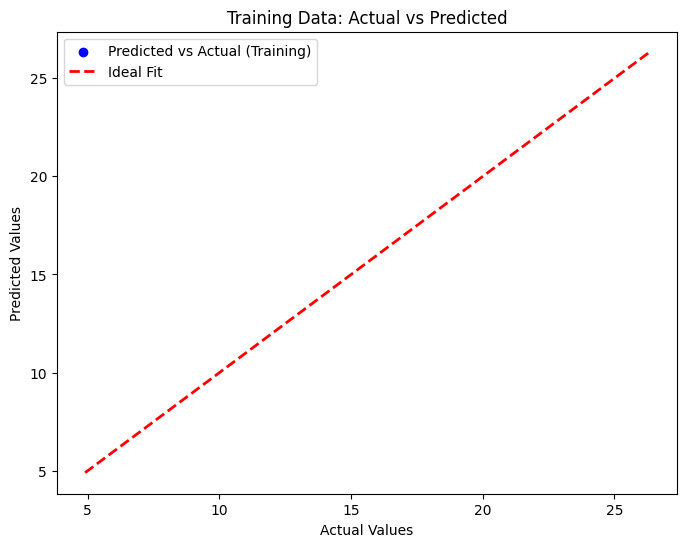

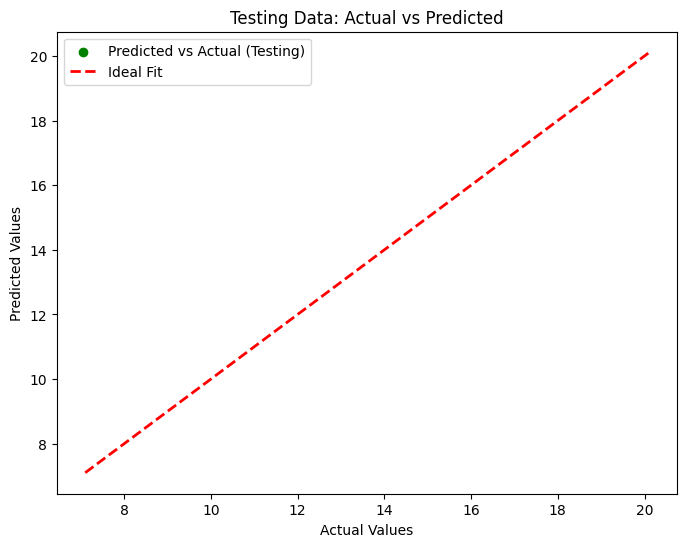

In [25]:
import matplotlib.pyplot as plt

# Step 12: Calculate Metrics for Training Data
train_mse = mse_loss(y_train, y_train_pred)
train_rmse = rmse_loss(y_train, y_train_pred)
train_r2 = r_squared(y_train, y_train_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")

# Step 13: Calculate Metrics for Test Data
test_mse = mse_loss(y_test, y_test_pred)
test_rmse = rmse_loss(y_test, y_test_pred)
test_r2 = r_squared(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Step 14: Plot Actual vs Predicted for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

# Step 15: Plot Actual vs Predicted for Testing Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual (Testing)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.show()